<a href="https://colab.research.google.com/github/AnovaYoung/HeartDisease_Prediction/blob/Anova-Branch/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
file_path = r'yout_file_here.csv'
df = pd.read_csv(file_path)

print("First few rows of the dataset:")
print(df.head())

print("\nBasic information about the dataset:")
print(df.info())

print("\nSummary statistics of the dataset:")
print(df.describe())

First few rows of the dataset:
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence 

**Total Entries**: 270

**Number of Columns**: 14

**Data Types:**
12 columns are of type int64 (integers).

1 column is of type float64 (floating-point numbers).

1 column is of type object (likely containing categorical data).

**No Missing Values**: Every column has 270 non-null entries, indicating there are no missing values in the dataset.

**Summary Statistics**
The summary statistics provide insights into the distribution and central tendencies of the numerical features:

**Age**: Ranges from 29 to 77 years, with a mean of 54.43 years.

**Sex**: Binary feature with 0 for females and 1 for males; mean of 0.68 suggests a higher number of males in the dataset.

**Chest Pain Type**: Categories ranging from 1 to 4; mean of 3.17.

**Blood Pressure** (BP): Ranges from 94 to 200 mm Hg, with a mean of 131.34 mm Hg.

**Cholesterol**: Ranges from 126 to 564 mg/dL, with a mean of 249.66 mg/dL.

Fasting Blood Sugar (FBS) over 120 **bold text**: Binary feature indicating whether FBS > 120 mg/dL; mean of 0.15.

**EKG Results**: Categorical feature with values ranging from 0 to 2; mean of 1.02.

**Max HR**: Maximum heart rate achieved, ranging from 71 to 202, with a mean of 149.68.

**Exercise Angina**: Binary feature indicating presence of exercise-induced angina; mean of 0.33.

**ST Depression**: Range from 0.0 to 6.2, with a mean of 1.05.

**Slope of ST**: Categorical feature with values ranging from 1 to 3; mean of 1.59.

**Number of Vessels Fluro**: Number of major vessels colored by fluoroscopy, ranging from 0 to 3, with a mean of 0.67.

**Thallium**: Categorical feature with values ranging from 3 to 7; mean of 4.70.

**Key Points:**

No Missing Data: The dataset is complete with no missing values.

Categorical Features: Several features are categorical and may need encoding.

Target Variable: The Heart Disease column is categorical with two classes, indicating a classification problem.

Potential Outliers: Some features like Cholesterol and ST Depression have wide ranges, indicating potential outliers.

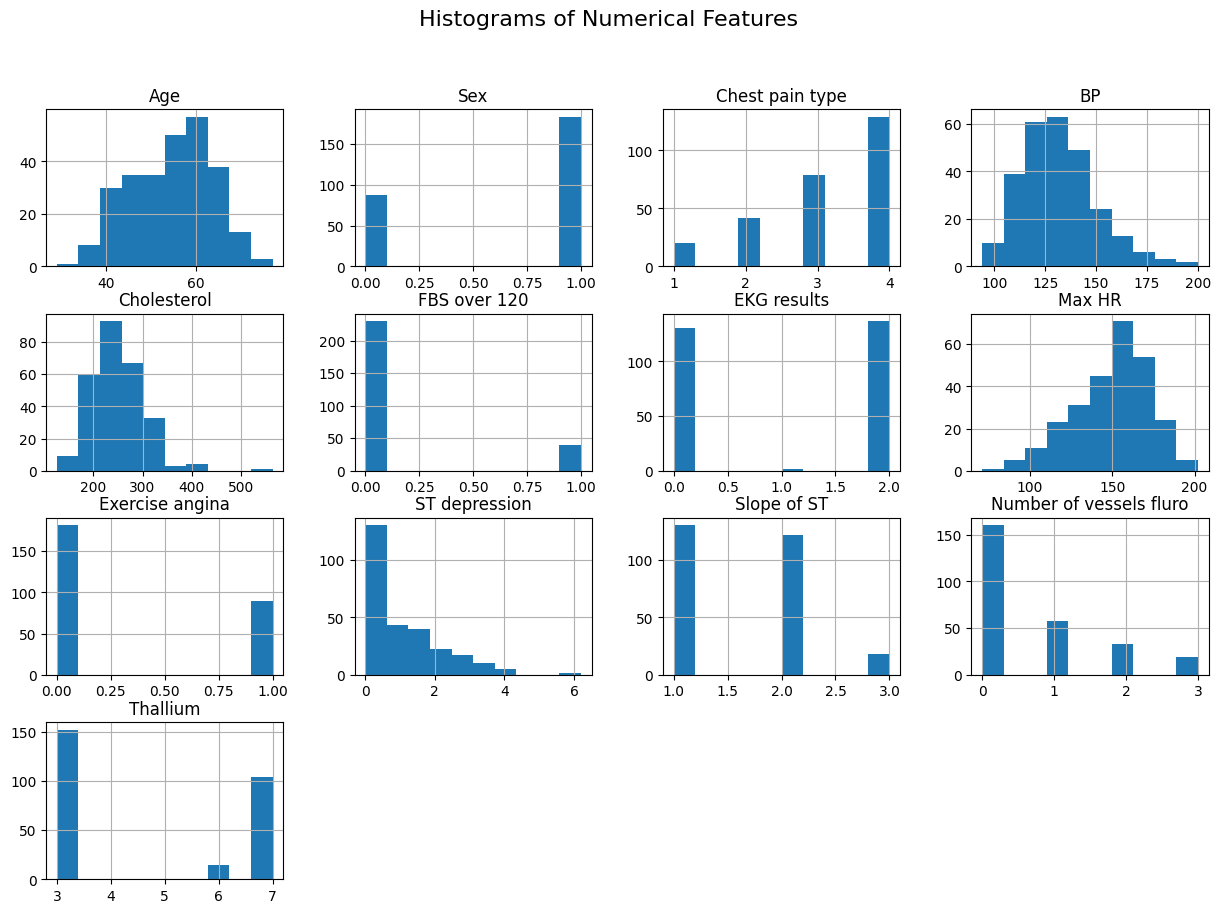

In [15]:
# this is a histograms for all numerical columns
df.hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

Somewhat re-iterating above.

Quick analysis:

Age: The distribution is roughly normal, centered around the mean age of about 54 years.

Sex: The dataset has more males (1) than females (0).

Chest Pain Type: Most patients have chest pain type 3 or 4.

BP (Blood Pressure): The distribution is roughly normal, with most values between 120 and 150 mm Hg.

Cholesterol: The distribution is right-skewed, with a few high cholesterol values indicating potential outliers.

FBS over 120: Most patients have fasting blood sugar levels not over 120 mg/dL.

EKG Results: The dataset has a balanced distribution among the three EKG result categories.

Max HR (Maximum Heart Rate): The distribution is roughly normal, centered around 150 bpm.
Exercise Angina: Most patients do not experience exercise-induced angina.

ST Depression: The distribution is right-skewed, with most values between 0 and 2.

Slope of ST: The dataset has a balanced distribution among the three slope categories.

Number of Vessels Fluro: Most patients have 0 or 1 major vessels colored by fluoroscopy.

Thallium: The distribution shows three primary categories, with most values being 3, 6, or 7.

In [16]:
# Now lets analyze and convert categorical features

df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Display the first few rows to confirm the conversion
print("Updated dataset with numerical target variable:")
print(df.head())

Updated dataset with numerical target variable:
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0      

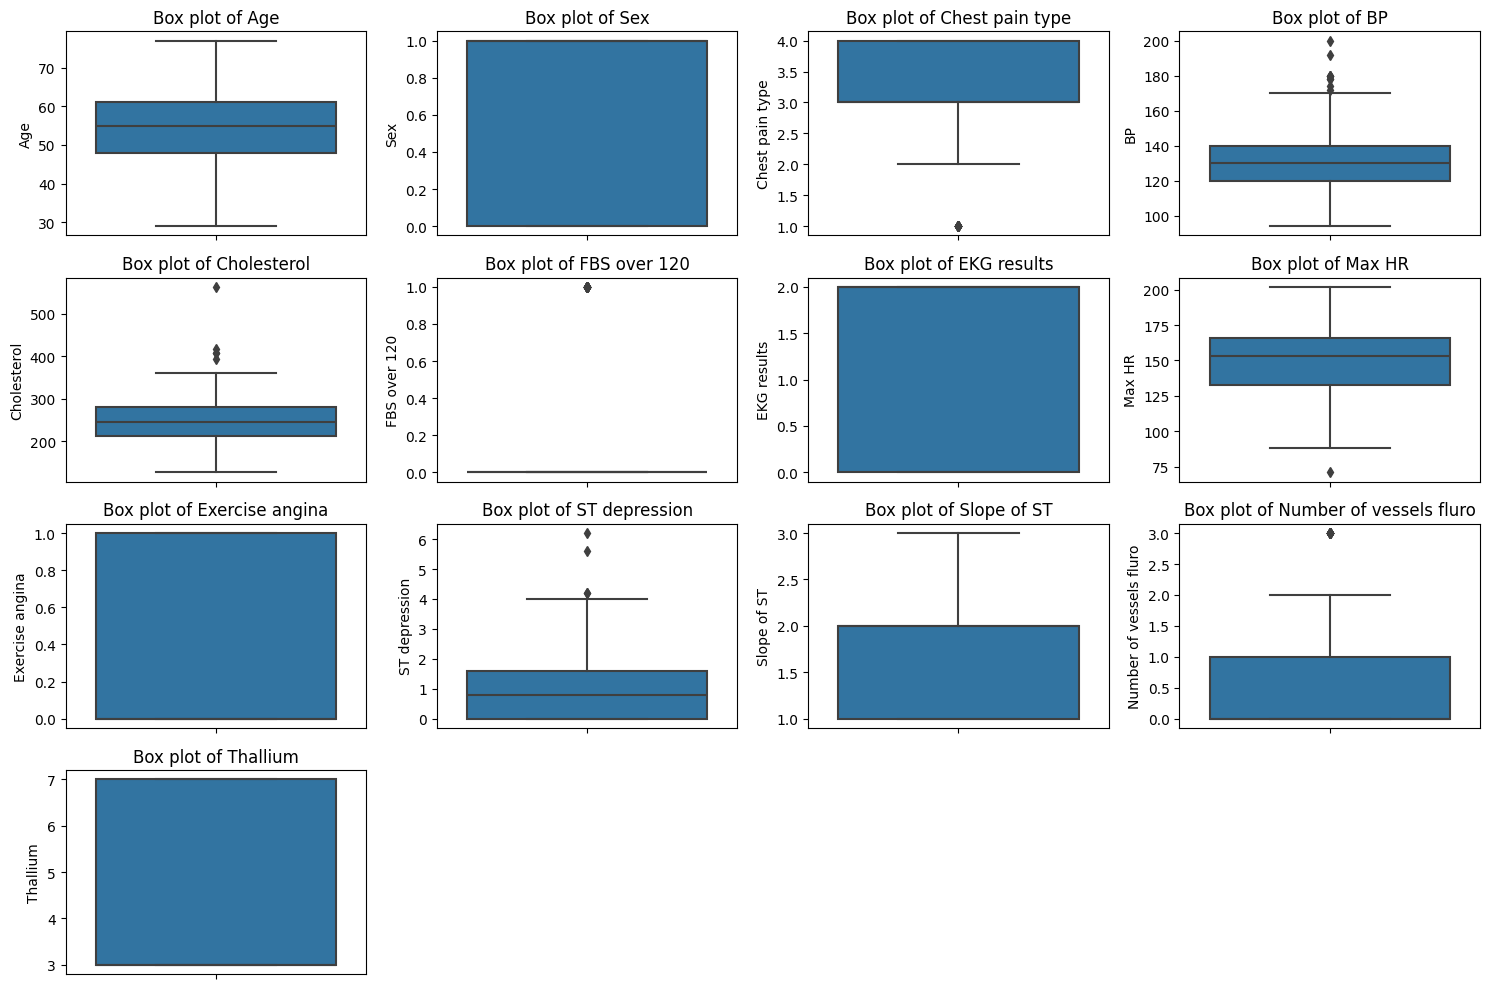

In [17]:
import seaborn as sns

# We are going to perform correlation analysis to identify potential outliers in the data
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()


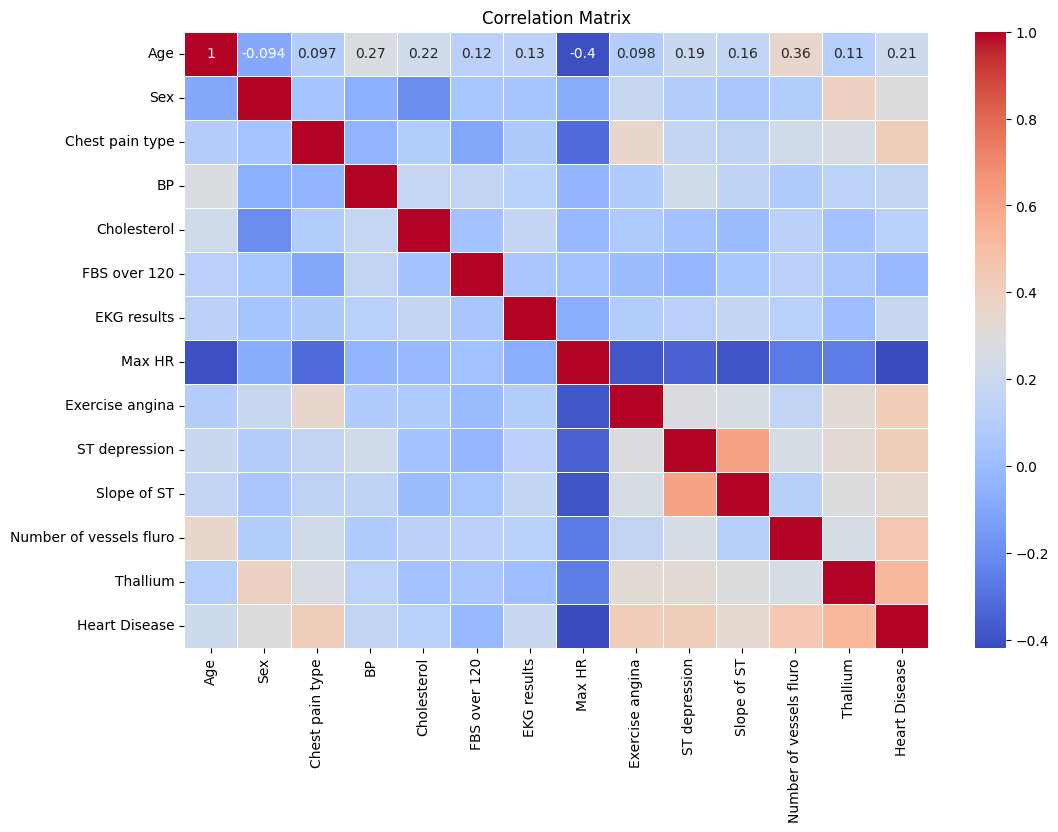

In [18]:
# And now calculate the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**Lets Analyze Both Box-Plots and Correlation Matrix**

**BOX PLOTS**

Age: The age distribution appears fairly normal with no significant outliers.

Sex: Binary feature with no outliers, as expected.
Chest Pain Type: One minor outlier in chest pain type 1.

BP (Blood Pressure): Several outliers above 160 mm Hg, some patients have significantly high blood pressure.

Cholesterol: Noticeable outliers above 400 mg/dL, some patients also have very high cholesterol levels.

FBS over 120: One outlier with FBS over 120.

EKG Results: No significant outliers observed.

Max HR (Maximum Heart Rate): One outlier below 100 bpm.

Exercise Angina: Binary feature with no outliers.

ST Depression: A few outliers above 4, this means there is high levels of ST depression in some patients.

Slope of ST: No significant outliers observed.

Number of Vessels Fluro: One minor outlier with a value of 3.

Thallium: No significant outliers.

**CORRELATION MATRIX**

Strong Positive Correlation:

Thallium and Heart Disease (0.53): Higher thallium levels are associated with a higher likelihood of heart disease.

Number of vessels fluro and Heart Disease (0.46): More vessels colored by fluoroscopy indicate a higher risk of heart disease.

Chest pain type and Heart Disease (0.42): Certain types of chest pain are strongly associated with heart disease.

Exercise angina and Heart Disease (0.42): Presence of exercise-induced angina is strongly linked to heart disease.

Negative Correlation:

Max HR and Heart Disease (-0.42): Lower maximum heart rates are associated with a higher likelihood of heart disease.

Moderate Correlations:

Sex and Heart Disease (0.39): Males are more likely to have heart disease. (true or population bias?)

Slope of ST and Heart Disease (0.34): Certain slopes of the ST segment are associated with heart disease.

ST depression and Heart Disease (0.42): Higher ST depression values are linked to heart disease.

To handle outliers, the specific outliers in Cholesterol, BP, and ST Depression will be capped at the 95th percentile to mitigate their impact. It will with stability and performance in the model.

In [19]:
# This is the function to cap outliers at the 95th percentile
def cap_outliers(df, columns):
    for col in columns:
        upper_limit = df[col].quantile(0.95)
        df[col] = df[col].apply(lambda x: upper_limit if x > upper_limit else x)
    return df

# List of the specific columns to cap outliers
columns_to_cap = ['Cholesterol', 'BP', 'ST depression']

# Capping outliers
df = cap_outliers(df, columns_to_cap)

# Display summary statistics after capping
print("Summary statistics after capping outliers:")
print(df.describe())


Summary statistics after capping outliers:
              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  130.533333   247.106296   
std      9.109067    0.468195         0.950090   15.905763    44.195526   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  160.000000   326.550000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000     270.000000   
mean       0.148148     1.022222  149.677778         0.329630       1.011630   
std        0.355906     0.997891   23.165

**FEATURE ENGINEERING!**

In [20]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to normalize
numerical_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows to confirm normalization
print("First few rows after normalization:")
print(df.head())


First few rows after normalization:
        Age  Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0  1.712094    1                4 -0.033593     1.697746             0   
1  1.382140    0                3 -0.978399     1.800889             0   
2  0.282294    1                2 -0.411515     0.314953             0   
3  1.052186    1                4 -0.159567     0.360290             0   
4  2.152032    0                2 -0.663464     0.496303             0   

   EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0            2 -1.759208                0       1.342400            2   
1            2  0.446409                0       0.568889            2   
2            0 -0.375291                0      -0.688067            1   
3            0 -1.932198                1      -0.784756            2   
4            2 -1.240239                1      -0.784756            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3

** **Attempting progress with the Catboost model**_(Long)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from catboost import CatBoostClassifier


In [25]:
# Assuming df is your dataset
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [26]:
# Initialize CatBoost classifier with chosen hyperparameters
catboost_model = CatBoostClassifier(iterations=1000,  # Number of trees (default is 1000)
                                    learning_rate=0.1,  # Learning rate (default is 0.1)
                                    depth=6,  # Depth of trees (default is 6)
                                    loss_function='Logloss',  # Loss function for binary classification
                                    eval_metric='Accuracy',  # Evaluation metric
                                    random_seed=42,  # Random seed for reproducibility
                                    verbose=100  # Print every 100 iterations
                                    )

# Fit the model on the training data
catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)


0:	learn: 0.8580247	test: 0.5925926	best: 0.5925926 (0)	total: 1.73ms	remaining: 1.73s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7037037037
bestIteration = 31

Shrink model to first 32 iterations.


In [27]:
# Predictions on validation set
y_val_pred_catboost = catboost_model.predict(X_val)

# Evaluate on validation set
print("CatBoost Model Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_catboost))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_catboost))
print("Classification Report:\n", classification_report(y_val, y_val_pred_catboost))

# Predictions on test set
y_test_pred_catboost = catboost_model.predict(X_test)

# Evaluate on test set
print("CatBoost Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_catboost))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_catboost))
print("Classification Report:\n", classification_report(y_test, y_test_pred_catboost))


CatBoost Model Evaluation on Validation Set:
Accuracy: 0.7037037037037037
Confusion Matrix:
 [[25  4]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76        29
           1       0.76      0.52      0.62        25

    accuracy                           0.70        54
   macro avg       0.72      0.69      0.69        54
weighted avg       0.72      0.70      0.69        54

CatBoost Model Evaluation on Test Set:
Accuracy: 0.9259259259259259
Confusion Matrix:
 [[33  1]
 [ 3 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       0.94      0.85      0.89        20

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



By addressing the problem with the Catboost model, we see approximately similar results as in the XGBoost model with Percision(68%) Recall(86%) and F1-Score(76%) for **Class 1** and Percision(76%) Recall(52%) and F1-Score(62%) for **Class 2**. With a higher recall and F1-Score, we opted to go with the XGBoost model. Additionally, XGBoost is well suited for further feature engineering, adding complexity to the model and potentially increaseing performance. It is to be noted via https://archive.ics.uci.edu/dataset/45/heart+disease that XGBoost is known to be of the higher performing models.

** **End Catboost model trial**_(Long)

**TRAIN-TEST-VALIDATION SPLIT**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split features from target variable
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [13]:
# Initializing and training the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_val_pred_xgb = xgb_model.predict(X_val)

# Evaluate the XGBoost model on val set
print("XGBoost Model Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_xgb))
print("Classification Report:\n", classification_report(y_val, y_val_pred_xgb))


XGBoost Model Evaluation on Validation Set:
Accuracy: 0.7222222222222222
Confusion Matrix:
 [[26  3]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.90      0.78        29
           1       0.81      0.52      0.63        25

    accuracy                           0.72        54
   macro avg       0.75      0.71      0.71        54
weighted avg       0.74      0.72      0.71        54



In [17]:
from xgboost import XGBClassifier

# Everything below is the same as above: this time for XGBoost model

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

xgb_model = XGBClassifier(random_state=42)

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search_xgb.fit(X_train, y_train)

best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best parameters for XGBoost:", best_params_xgb)
print("Best cross-validation accuracy for XGBoost:", best_score_xgb)


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best cross-validation accuracy for XGBoost: 0.8579545454545455


**TRYING TO ENHANCE THE MODELS**

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Everything the same as above: this time for XGBoost model

param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(random_state=42),
        param_distributions=param_grid_xgb,
        n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

random_search_xgb.fit(X_train, y_train)

best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_

print("Enhanced XGBoost Best Parameters:", best_params_xgb)
print("Enhanced XGBoost Best Cross-Validation Accuracy:", best_score_xgb)

best_xgb_model = XGBClassifier(**best_params_xgb, random_state=42)
best_xgb_model.fit(X_train, y_train)

y_val_pred_xgb = best_xgb_model.predict(X_val)
print("Enhanced XGBoost Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_xgb))
print("Classification Report:\n", classification_report(y_val, y_val_pred_xgb))

y_test_pred_xgb = best_xgb_model.predict(X_test)
print("Enhanced XGBoost Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_test_pred_xgb))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Enhanced XGBoost Best Parameters: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.3, 'colsample_bytree': 0.6}
Enhanced XGBoost Best Cross-Validation Accuracy: 0.8579545454545455
Enhanced XGBoost Evaluation on Validation Set:
Accuracy: 0.7037037037037037
Confusion Matrix:
 [[25  4]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76        29
           1       0.76      0.52      0.62        25

    accuracy                           0.70        54
   macro avg       0.72      0.69      0.69        54
weighted avg       0.72      0.70      0.69        54

Enhanced XGBoost Evaluation on Test Set:
Accuracy: 0.8518518518518519
Confusion Matrix:
 [[32  2]
 [ 6 14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           

**Lets Analyze The Models' Results**

Validation Set Performance:

Both models achieved similar accuracy on the validation set (~70.37%).

XGBoost has slightly better precision and recall for class 1 (Heart Disease) compared to Random Forest.

Test Set Performance:

XGBoost outperforms Random Forest with an accuracy of 85.19% compared to 77.78%.

XGBoost has higher precision, recall, and F1-score for both classes on the test set.

Conclusion

Based on the evaluation on the validation and test sets, the XGBoost model shows better overall performance and generalization compared to the Random Forest model.

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Training (60%), validation (20%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [24]:
# XGBoost model
best_xgb_model_smote = XGBClassifier(
    colsample_bytree=0.6,
    learning_rate=0.01,
    max_depth=3,
    n_estimators=200,
    subsample=0.6,
    gamma=0.3,
    random_state=42
)
best_xgb_model_smote.fit(X_train_smote, y_train_smote)

# Evaluate on the validation set
y_val_pred_xgb_smote = best_xgb_model_smote.predict(X_val)
print("SMOTE XGBoost Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_xgb_smote))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_xgb_smote))
print("Classification Report:\n", classification_report(y_val, y_val_pred_xgb_smote))


SMOTE XGBoost Evaluation on Validation Set:
Accuracy: 0.7037037037037037
Confusion Matrix:
 [[25  4]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76        29
           1       0.76      0.52      0.62        25

    accuracy                           0.70        54
   macro avg       0.72      0.69      0.69        54
weighted avg       0.72      0.70      0.69        54



Since SMOTE did not significantly improve the performance of the Random Forest model and the XGBoost model performed relatively better, I will proceed with ensemble learning.

Ensemble methods combine the predictions of multiple models to improve overall performance. One common approach is to use a "simple averaging of probabilities" or a "weighted averaging" if the models have different performance levels.

I will start with the simple averaging method.


**ENSEMBLE LEARNING**

In [25]:
import numpy as np

# This will get the prediction probabilities from both models
rf_probs = best_rf_model_smote.predict_proba(X_val)[:, 1]
xgb_probs = best_xgb_model_smote.predict_proba(X_val)[:, 1]

# Averaging the probabilities
ensemble_probs = (rf_probs + xgb_probs) / 2
ensemble_preds = np.where(ensemble_probs > 0.5, 1, 0)

print("Ensemble Model Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, ensemble_preds))
print("Confusion Matrix:\n", confusion_matrix(y_val, ensemble_preds))
print("Classification Report:\n", classification_report(y_val, ensemble_preds))

Ensemble Model Evaluation on Validation Set:
Accuracy: 0.6851851851851852
Confusion Matrix:
 [[24  5]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        29
           1       0.72      0.52      0.60        25

    accuracy                           0.69        54
   macro avg       0.69      0.67      0.67        54
weighted avg       0.69      0.69      0.68        54



Still not happy with these results.

I'm going to attempt "Stacking", (an advanced ensemble technique).

Stacking involves training a meta-model to combine the predictions of base models. I'll use Logistic Regression as my meta-model and i'm going to be using sklearn's StackingClassifier to implement it.

In [26]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the base models
estimators = [
    ('rf', RandomForestClassifier(
        bootstrap=True,
        max_depth=40,
        min_samples_leaf=8,
        min_samples_split=20,
        n_estimators=200,
        random_state=42
    )),
    ('xgb', XGBClassifier(
        colsample_bytree=0.6,
        learning_rate=0.01,
        max_depth=3,
        n_estimators=200,
        subsample=0.6,
        gamma=0.3,
        random_state=42
    ))
]

# Define the stacking model with Logistic Regression as the meta-model
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the stacking model
stacking_model.fit(X_train_smote, y_train_smote)

y_test_pred_stacking = stacking_model.predict(X_test)
print("Stacking Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_stacking))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_stacking))
print("Classification Report:\n", classification_report(y_test, y_test_pred_stacking))


Stacking Model Evaluation on Test Set:
Accuracy: 0.8518518518518519
Confusion Matrix:
 [[31  3]
 [ 5 15]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.83      0.75      0.79        20

    accuracy                           0.85        54
   macro avg       0.85      0.83      0.84        54
weighted avg       0.85      0.85      0.85        54



In [27]:
# Evaluate the stacking model on the validation set
y_val_pred_stacking = stacking_model.predict(X_val)
print("Stacking Model Evaluation on Validation Set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_stacking))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_stacking))
print("Classification Report:\n", classification_report(y_val, y_val_pred_stacking))


Stacking Model Evaluation on Validation Set:
Accuracy: 0.6851851851851852
Confusion Matrix:
 [[24  5]
 [12 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74        29
           1       0.72      0.52      0.60        25

    accuracy                           0.69        54
   macro avg       0.69      0.67      0.67        54
weighted avg       0.69      0.69      0.68        54



Validation Set Performance:

The validation set performance is pretty bad, the model is not generalizing well at all to unseen data. The accuracy is 0.6852, with a recall for class 1 (Heart Disease) at 0.52.

Test Set Performance:

The test set performance is good, with an accuracy of 0.8519. The recall for class 1 is 0.75, and precision is 0.83.

Conclusion
The stacking model shows a significant discrepancy between the validation and test set performances. The model performs really well on the test set, but its not reliable on truly unseen data. The meta-model did not significantly improve the validation performance.